### Notebook to calculate the theoretical travel time curves of a planteary model using TauP

Building obspy.taup model for '/Users/balthazar/Downloads/Radiative3d-spherical-shells/Models/MoonModels/ISSI_MOON_M1.nd' ...
filename = /Users/balthazar/Downloads/Radiative3d-spherical-shells/Models/MoonModels/ISSI_MOON_M1.nd
Done reading velocity model.
Radius of model . is 1737.1
Using parameters provided in TauP_config.ini (or defaults if not) to call SlownessModel...
Parameters are:
taup.create.min_delta_p = 0.1 sec / radian
taup.create.max_delta_p = 11.0 sec / radian
taup.create.max_depth_interval = 115.0 kilometers
taup.create.max_range_interval = 0.04363323129985824 degrees
taup.create.max_interp_error = 0.05 seconds
taup.create.allow_inner_core_s = True
Slow model  643 P layers,747 S layers
Done calculating Tau branches.
Done Saving Python/TaupModels/Model_Files/ISSI_MOON_M1.npz
Method run is done, but not necessarily successful.
Building obspy.taup model for '/Users/balthazar/Downloads/Radiative3d-spherical-shells/Models/MoonModels/ISSI_MOON_M2.nd' ...
filename = /Users/balth

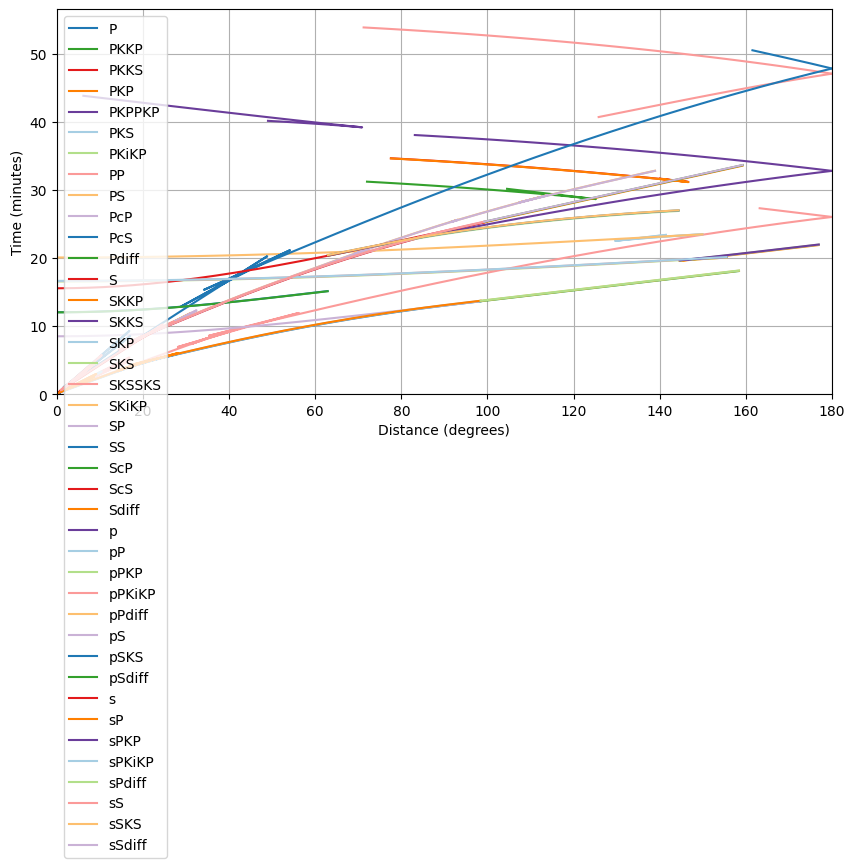

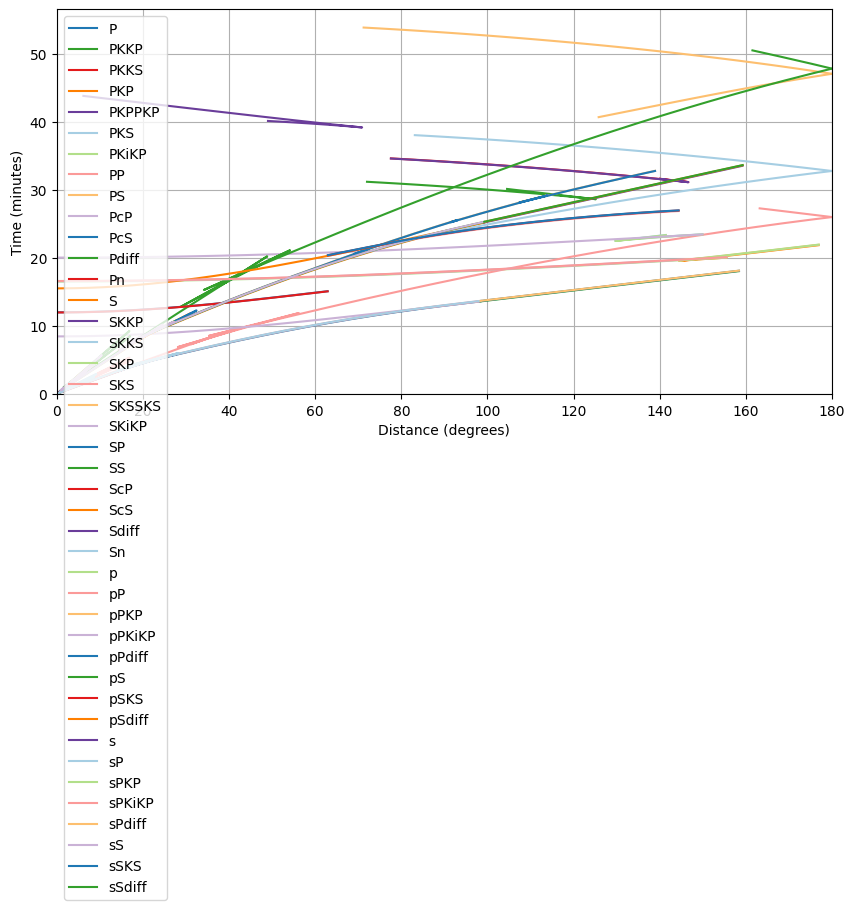

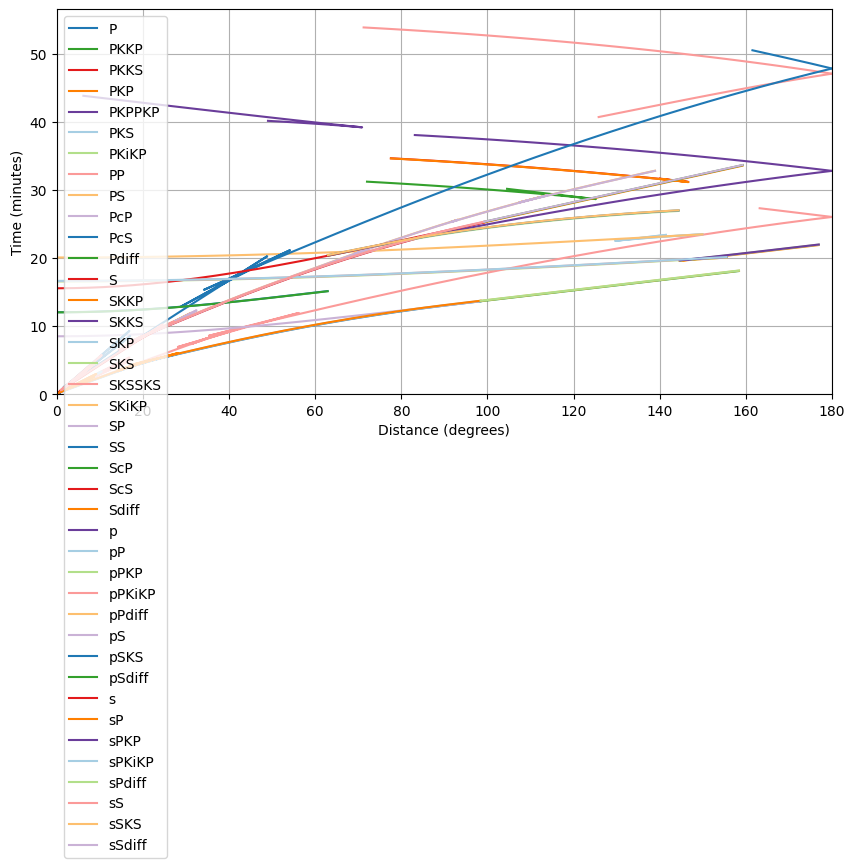

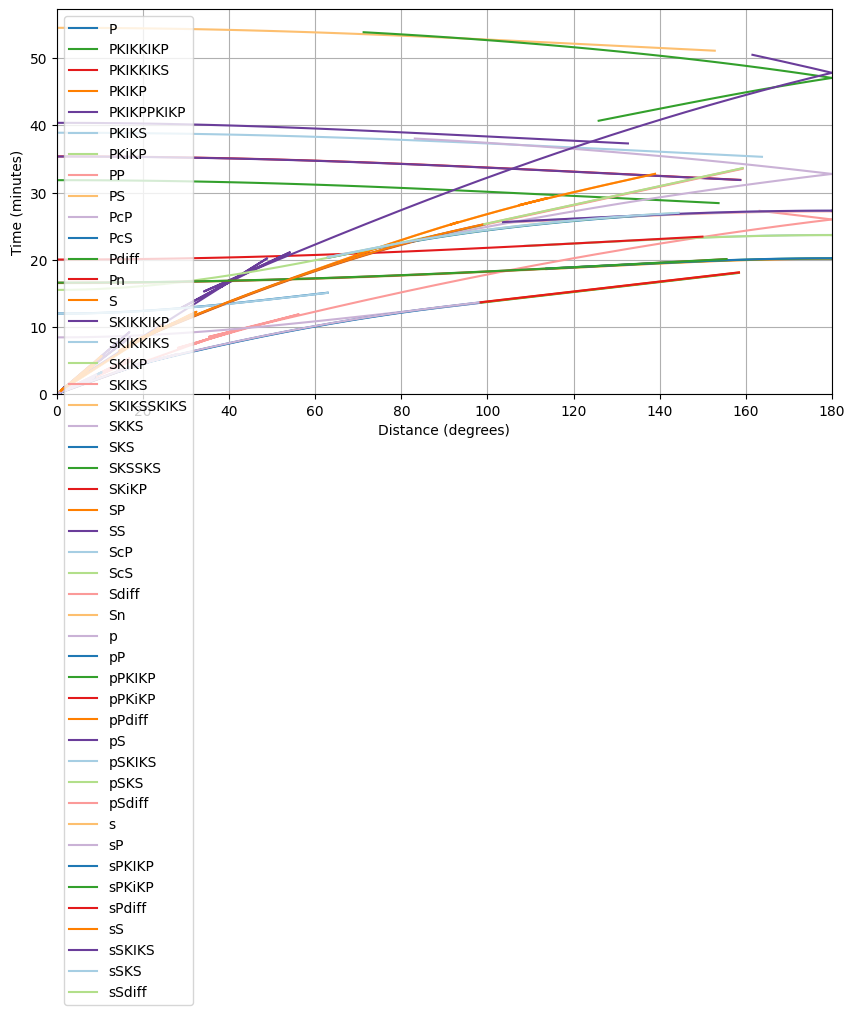

In [19]:
import matplotlib.pyplot as plt
from obspy.taup import TauPyModel, plot_travel_times
from obspy.taup.taup_create import build_taup_model
# Load the standard Earth model (IASP91)

out_dir = 'Python/TaupModels/Model_Files'
base_dir= 'Python/TaupModels/'
ModelNames = ["ISSI_MOON_M1","ISSI_MOON_M2", "ISSI_MOON_M3","MoonWeber_Science_2011"]

for name in ModelNames:
    file_path = f"/Users/balthazar/Downloads/Radiative3d-spherical-shells/Models/MoonModels/{name}.nd"
    build_taup_model(file_path,out_dir)
    model = TauPyModel(f'Python/TaupModels/Model_Files/{name}.npz')

    # Dynamically extract all possible phase names
    all_phases = set()
    depths = [0, 10, 50, 100, 300, 600]  # Different depths to capture depth-dependent phases
    distances = range(0, 181, 5)  # Cover a full range of epicentral distances

    for depth in depths:
        for dist in distances:
            arrivals = model.get_travel_times(source_depth_in_km=depth, distance_in_degree=dist)
            all_phases.update(arrival.name for arrival in arrivals)

    all_phases = sorted(all_phases)  # Sort for consistency

    # Initialize figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax = plot_travel_times(source_depth=10, phase_list=all_phases, ax=ax, show=False)

    # Initialize a dictionary to store travel-time data
    travel_time_data = {phase: {} for phase in all_phases}  # Use dictionary to filter unique distances

    # Extract travel-time curves
    for line in ax.get_lines():
        phase_name = line.get_label()
        if phase_name in travel_time_data:  # Ensure the phase is recognized
            x_data = line.get_xdata()
            y_data = line.get_ydata()
            
            for x, y in zip(x_data, y_data):
                if x not in travel_time_data[phase_name]:
                    travel_time_data[phase_name][x] = y  # Store only the first (earliest) arrival

    # Convert back to list format for saving
    travel_time_data = {phase: sorted(travel_time_data[phase].items()) for phase in travel_time_data}

    # Now, travel_time_data contains travel-time curves for each phase
    # Example: travel_time_data["P"] contains a sorted list of (distance, time) tuples for the P-wave

    # Optional: Save to a file
    import json
    with open(f"{base_dir}/json_curves/{name}.json", "w") as f:
        json.dump(travel_time_data, f)
